In [1595]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import pandas as pd
import time
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

 # scraping links from main pages

In [ ]:
# Gettig the links of the first 300  main pages 

url='https://www.camping.info/en/search?adults=1&flex=2'
lst_links1=[]
counter =0
while counter < 300:
    time.sleep(1)
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, "html.parser")
    
    if counter == 0:
        url ='https://www.camping.info'+webpage.find_all('a',attrs={'class':'page-link'})[1].get('href')
        
    if (webpage.find_all('a',attrs={'class':'page-link'})[4]) is None:
        continue
        
    if counter != 0:
        url ='https://www.camping.info'+webpage.find_all('a',attrs={'class':'page-link'})[4].get('href')    
    lst_links1.append(url)
    counter +=1
lst_links1   

In [460]:
# getting the links in the 300 -600  main pages 

url2='https://www.camping.info/en/search?adults=1&flex=2&offset=4500'
lst_links2=[]
counter =0
while counter < 300:
    time.sleep(1)
    response = requests.get(url2)
    webpage = BeautifulSoup(response.content, "html.parser")
    
    if counter == 0:
        url2 ='https://www.camping.info'+webpage.find_all('a',attrs={'class':'page-link'})[1].get('href')
        
    if (webpage.find_all('a',attrs={'class':'page-link'})[4]) is None:
        continue
        
    if counter != 0:
        url2 ='https://www.camping.info'+webpage.find_all('a',attrs={'class':'page-link'})[4].get('href')    
    lst_links2.append(url2)
    counter +=1
lst_links2   

['https://www.camping.info/en/search?adults=1&flex=2&offset=4485',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4500',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4515',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4530',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4545',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4560',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4575',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4590',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4605',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4620',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4635',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4650',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4665',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4680',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=46

In [466]:
lst_links2

['https://www.camping.info/en/search?adults=1&flex=2&offset=4515',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4530',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4545',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4560',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4575',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4590',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4605',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4620',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4635',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4650',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4665',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4680',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4695',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4710',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=47

In [462]:
# getting the links in the 300 -600 main pages

url3='https://www.camping.info/en/search?adults=1&flex=2&offset=8970'
lst_links3=[]
counter =0
while counter < 220:
    time.sleep(1)
    response = requests.get(url3)
    webpage = BeautifulSoup(response.content, "html.parser")
    
    if counter == 0:
        url3 ='https://www.camping.info'+webpage.find_all('a',attrs={'class':'page-link'})[1].get('href')
        
    if (webpage.find_all('a',attrs={'class':'page-link'})[4]) is None:
        continue
        
    if counter != 0:
        url3 ='https://www.camping.info'+webpage.find_all('a',attrs={'class':'page-link'})[4].get('href')    
    lst_links3.append(url3)
    counter +=1
lst_links3   

['https://www.camping.info/en/search?adults=1&flex=2&offset=8955',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=8970',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=8985',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9000',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9015',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9030',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9045',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9060',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9075',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9090',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9105',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9120',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9135',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9150',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=91

In [1906]:
link1 = pd.read_csv('lst_links1.csv')
link2 = pd.read_csv('lst_links2.csv')
link3 = pd.read_csv('lst_link3.csv')
link1

,Unnamed: 0,0
0,0,https://www.camping.info/en/search?adults=1&fl...
1,1,https://www.camping.info/en/search?adults=1&fl...
2,2,https://www.camping.info/en/search?adults=1&fl...
3,3,https://www.camping.info/en/search?adults=1&fl...
4,4,https://www.camping.info/en/search?adults=1&fl...
...,...,...
295,295,https://www.camping.info/en/search?adults=1&fl...
296,296,https://www.camping.info/en/search?adults=1&fl...
297,297,https://www.camping.info/en/search?adults=1&fl...
298,298,https://www.camping.info/en/search?adults=1&fl...


In [1907]:
link2

,Unnamed: 0,0
0,0,https://www.camping.info/en/search?adults=1&fl...
1,1,https://www.camping.info/en/search?adults=1&fl...
2,2,https://www.camping.info/en/search?adults=1&fl...
3,3,https://www.camping.info/en/search?adults=1&fl...
4,4,https://www.camping.info/en/search?adults=1&fl...
...,...,...
293,293,https://www.camping.info/en/search?adults=1&fl...
294,294,https://www.camping.info/en/search?adults=1&fl...
295,295,https://www.camping.info/en/search?adults=1&fl...
296,296,https://www.camping.info/en/search?adults=1&fl...


In [1908]:
link3

,Unnamed: 0,0
0,0,https://www.camping.info/en/search?adults=1&fl...
1,1,https://www.camping.info/en/search?adults=1&fl...
2,2,https://www.camping.info/en/search?adults=1&fl...
3,3,https://www.camping.info/en/search?adults=1&fl...
4,4,https://www.camping.info/en/search?adults=1&fl...
...,...,...
215,215,https://www.camping.info/en/search?adults=1&fl...
216,216,https://www.camping.info/en/search?adults=1&fl...
217,217,https://www.camping.info/en/search?adults=1&fl...
218,218,https://www.camping.info/en/search?adults=1&fl...


# functions for scraping the inside pages

In [1108]:
url='https://www.camping.info/en/search?adults=1&flex=2'

# in oreder to scrape the details of each campsite we need to get the links for each campsite

def get_urls_in_page(url):
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, "html.parser")
    lst_details = webpage.find_all('a',attrs={'class':'button button--primary order-3 w-100'})
    lst_details
    lst=[]
    for link in lst_details:
        lst.append('https://www.camping.info'+link.get('href'))
    return lst    

# scraping the details of the current page of the campsite after entering the specific one

def get_attributes_for_dataframe(url):
    time.sleep(6)
    response = requests.get(url)
    webpage = BeautifulSoup(response.content, "html.parser")
    lst=[]
    flag_price=True
    flag_rating=True
    #price:
    if webpage.find('div',attrs={'class':'h1 mb-0'}):
        lst.append(webpage.find('div',attrs={'class':'h1 mb-0'}).text+'0')
        flag_price=False
    #country:
    lst.append(webpage.find('a',attrs={'class':'text-black'}).text)
    #rating:
    if (webpage.find('span',attrs={'class':'circular-text text-black rating-radial__value mb-0 h4'}).text) == '—':
        flag_rating = True
    else:
        lst.append(webpage.find('span',attrs={'class':'circular-text text-black rating-radial__value mb-0 h4'}).text)
        flag_rating = False
    
    
    # Not all capmsites have the same structure of the page so we need flags for sraping the details that we Do HAVE
    
    flag_sea=True
    flag_lake=True
    flag_river=True
    flag_mountain=True
    flag_height = True
    flag_city=True
    flag_transport=True
    flag_size=True
    flag_total=True
    flag_caravan = True
    
    for att in webpage.find_all('span', attrs={'class':'text-medium'}):   
        if att.text == 'Size of the site':
            flag_size =False
            lst.append(att.find_next_sibling('span').text.strip().split(' ')[0])
            continue
            
        if att.text == 'Total number of pitches':
            flag_total=False
            lst.append(att.find_next_sibling('span').text.strip().split(' ')[0])
            continue
        
        if att.text == 'Stopover pitches in front of the gates also for caravans':
            flag_caravan=False
            lst.append(att.find_next_sibling('span').text.strip())
            continue
        
        if att.text == 'Sea':
            flag_sea=False
            sea_in_site = lst.append(att.find_next_sibling('span').text.strip().split(' ')[0])
            continue
    
        if att.text == 'Lake':
            flag_lake=False
            lst.append(att.find_next_sibling('span').text.strip().split(' ')[0])
            continue
        
        if att.text == 'River':
            flag_river=False
            lst.append(att.find_next_sibling('span').text)
            continue
        
            
        if att.text == 'In the mountains':
            flag_mountain=False
            lst.append(att.find_next_sibling('span').text)
            continue
         
            
        if att.text == 'Height (above sea level)':
            flag_height=False
            lst.append(att.find_next_sibling('span').text.strip().split(' ')[0])
            continue
        
            
        if att.text == 'Next city':
            flag_city =False
            lst.append(att.find_next_sibling('span').text.strip().split(' ')[0])
            continue
        
            
        if att.text == 'Train or bus station':
            flag_transport=False
            lst.append(att.find_next_sibling('span').text.strip().split(' ')[0])
            continue
    
   # If there are a missing value we will put None in that place 

    if flag_price:
        lst.insert(0,None)
        
    if flag_rating:
        lst.insert(2,None)
        
    if flag_size:
        lst.insert(3,None)
        
    if flag_total:
        lst.insert(4,None)
        
    if flag_caravan:
        lst.insert(5,None)
        
    if  flag_sea:
        lst.insert(6,None)
        
    if  flag_lake:
        lst.insert(7,None)
        
    if  flag_river:
        lst.insert(8,None)
        
    if  flag_mountain:
        lst.insert(9,None)
        
    if  flag_height:
        lst.insert(10,None)
        
    if    flag_city:
        lst.insert(11,None)
        
    if flag_transport:   
        lst.insert(12,None)
        
    return lst
    
    


# scraping the attributes using the links ( information divided into 8 data frames)

In [10]:
listi = lst_links1[0:114]

In [11]:
# I needed to scrape the data in steps in oreder to keep on tracking the data i got and the data i didnt
# I divided the data to 8 dataframes

lst_price=[]
lst_country=[]
lst_rating=[]
lst_size_of_site=[]
lst_total_number_of_pitches=[]
lst_pitches_for_caravans=[]
lst_sea=[]
lst_lake=[]
lst_river_in_site=[]
lst_site_on_mountains=[]
lst_Height_of_site=[]
lst_next_city_distance=[]
lst_transport_distance=[]  

for page in listi:
    for link in get_urls_in_page(page):
        temp_lst = get_attributes_for_dataframe(link)
        lst_price.append(temp_lst[0])
        lst_country.append(temp_lst[1])
        lst_rating.append(temp_lst[2])
        lst_size_of_site.append(temp_lst[3])
        lst_total_number_of_pitches.append(temp_lst[4])
        lst_pitches_for_caravans.append(temp_lst[5])
        lst_sea.append(temp_lst[6])
        lst_lake.append(temp_lst[7])
        lst_river_in_site.append(temp_lst[8])
        lst_site_on_mountains.append(temp_lst[9])
        lst_Height_of_site.append(temp_lst[10])
        lst_next_city_distance.append(temp_lst[11])
        lst_transport_distance.append(temp_lst[12])
    
data = {'country':lst_country,'price':lst_price,'rating':lst_rating,'size_of_site':lst_size_of_site,'total_pitches':lst_total_number_of_pitches,
       'caravns':lst_pitches_for_caravans,'sea':lst_sea,'lake':lst_lake,'river':lst_river_in_site,'mountain':lst_site_on_mountains,'Height':lst_Height_of_site,
       'next_city':lst_next_city_distance,'transport':lst_transport_distance}
df = pd.DataFrame(data)
df






,country,price,rating,size_of_site,total_pitches,caravns,sea,lake,river,mountain,Height,next_city,transport
0,Austria,29.0,4.8,3,50,Not available,None,None,On site,No,300,6,0.2
1,Germany,24.0,4.8,12,310,Available,None,On,0.5 km,No,355,2.5,0.6
2,Poland,17.0,4.8,4.5,200,Not available,On,20,5 km,No,38,2,0.1
3,Austria,28.0,4.8,1.5,65,Not available,None,On,None,Yes,960,7,1
4,Germany,33.0,4.7,11,250,Available,140,15,5 km,No,81,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,France,19.0,None,21,199,None,12,2,8 km,No,None,12,12
1493,France,20.0,None,10,434,None,4,5,None,No,None,6,2
1494,France,30.0,None,3,30,Not available,0.8,None,None,No,None,4,0.2
1495,France,43.0,None,7,238,None,1.8,None,None,No,None,None,3


In [33]:
df.to_csv('data1.csv')

In [14]:
new_list = lst_links1[115:227]
new_list

['https://www.camping.info/en/search?adults=1&flex=2&offset=1740',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1755',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1770',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1785',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1800',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1815',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1830',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1845',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1860',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1875',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1890',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1905',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1920',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=1935',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=19

In [16]:
lst_price1=[]
lst_country1=[]
lst_rating1=[]
lst_size_of_site1=[]
lst_total_number_of_pitches1=[]
lst_pitches_for_caravans1=[]
lst_sea1=[]
lst_lake1=[]
lst_river_in_site1=[]
lst_site_on_mountains1=[]
lst_Height_of_site1=[]
lst_next_city_distance1=[]
lst_transport_distance1=[]  

for page in new_list:
    for link in get_urls_in_page(page):
        temp_lst1 = get_attributes_for_dataframe(link)
        
        lst_price1.append(temp_lst1[0])
        
        lst_country1.append(temp_lst1[1])
        
        lst_rating1.append(temp_lst1[2])
        
        lst_size_of_site1.append(temp_lst1[3])
        
        lst_total_number_of_pitches1.append(temp_lst1[4])
        
        lst_pitches_for_caravans1.append(temp_lst1[5])
        
        lst_sea1.append(temp_lst1[6])
        
        lst_lake1.append(temp_lst1[7])
        
        lst_river_in_site1.append(temp_lst1[8])
        
        lst_site_on_mountains1.append(temp_lst1[9])
        
        lst_Height_of_site1.append(temp_lst1[10])
        
        lst_next_city_distance1.append(temp_lst1[11])
        
        lst_transport_distance1.append(temp_lst1[12])
        
    
data = {'country':lst_country1,'price':lst_price1,'rating':lst_rating1,'size_of_site':lst_size_of_site1,'total_pitches':lst_total_number_of_pitches1,
       'caravns':lst_pitches_for_caravans1,'sea':lst_sea1,'lake':lst_lake1,'river':lst_river_in_site1,'mountain':lst_site_on_mountains1,'Height':lst_Height_of_site1,
       'next_city':lst_next_city_distance1,'transport':lst_transport_distance1}
df1 = pd.DataFrame(data)
df1


,country,price,rating,size_of_site,total_pitches,caravns,sea,lake,river,mountain,Height,next_city,transport
0,France,32.0,None,1,None,None,None,None,On site,None,None,None,0.2
1,France,26.0,None,None,None,Not available,On,None,None,None,None,4,None
2,France,44.0,None,None,100,None,1.5,None,None,No,None,2,0.3
3,France,29.0,None,3,110,Not available,25,9,None,No,None,4,1
4,France,22.0,None,None,347,Not available,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,France,17.0,5.0,None,None,None,None,None,None,No,None,None,On
1296,France,17.0,5.0,None,None,None,None,4,None,Yes,None,None,0.5
1297,France,16.0,5.0,None,None,None,None,None,None,Yes,None,None,None
1298,France,17.0,5.0,None,None,None,None,None,On site,Yes,None,None,0.2


In [35]:
df1.to_csv('data2.csv')

In [18]:
new_list1=lst_links2[0:112]
new_list1

['https://www.camping.info/en/search?adults=1&flex=2&offset=4515',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4530',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4545',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4560',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4575',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4590',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4605',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4620',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4635',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4650',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4665',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4680',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4695',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=4710',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=47

In [19]:
lst_price2=[]
lst_country2=[]
lst_rating2=[]
lst_size_of_site2=[]
lst_total_number_of_pitches2=[]
lst_pitches_for_caravans2=[]
lst_sea2=[]
lst_lake2=[]
lst_river_in_site2=[]
lst_site_on_mountains2=[]
lst_Height_of_site2=[]
lst_next_city_distance2=[]
lst_transport_distance2=[]  

for page in new_list1:
    for link in get_urls_in_page(page):
        temp_lst2 = get_attributes_for_dataframe(link)
        
        lst_price2.append(temp_lst2[0])
        
        lst_country2.append(temp_lst2[1])
        
        lst_rating2.append(temp_lst2[2])
        
        lst_size_of_site2.append(temp_lst2[3])
        
        lst_total_number_of_pitches2.append(temp_lst2[4])
        
        lst_pitches_for_caravans2.append(temp_lst2[5])
        
        lst_sea2.append(temp_lst2[6])
        
        lst_lake2.append(temp_lst2[7])
        
        lst_river_in_site2.append(temp_lst2[8])
        
        lst_site_on_mountains2.append(temp_lst2[9])
        
        lst_Height_of_site2.append(temp_lst2[10])
        
        lst_next_city_distance2.append(temp_lst2[11])
        
        lst_transport_distance2.append(temp_lst2[12])
        
    
data = {'country':lst_country2,'price':lst_price2,'rating':lst_rating2,'size_of_site':lst_size_of_site2,'total_pitches':lst_total_number_of_pitches2,
       'caravns':lst_pitches_for_caravans2,'sea':lst_sea2,'lake':lst_lake2,'river':lst_river_in_site2,'mountain':lst_site_on_mountains2,'Height':lst_Height_of_site2,
       'next_city':lst_next_city_distance2,'transport':lst_transport_distance2}
df2 = pd.DataFrame(data)
df2

AttributeError: 'NoneType' object has no attribute 'text'

In [20]:
lst_price2
lst_country2
lst_rating2
lst_size_of_site2
lst_total_number_of_pitches2
lst_pitches_for_caravans2
lst_sea2
lst_lake2
lst_river_in_site2
lst_site_on_mountains2
lst_Height_of_site2
lst_next_city_distance2
lst_transport_distance2
data = {'country':lst_country2,'price':lst_price2,'rating':lst_rating2,'size_of_site':lst_size_of_site2,'total_pitches':lst_total_number_of_pitches2,
       'caravns':lst_pitches_for_caravans2,'sea':lst_sea2,'lake':lst_lake2,'river':lst_river_in_site2,'mountain':lst_site_on_mountains2,'Height':lst_Height_of_site2,
       'next_city':lst_next_city_distance2,'transport':lst_transport_distance2}
df2 = pd.DataFrame(data)
df2

,country,price,rating,size_of_site,total_pitches,caravns,sea,lake,river,mountain,Height,next_city,transport
0,France,15.0,4.7,None,49,Not available,None,None,None,None,None,None,None
1,France,18.0,4.7,2.3,152,Not available,On,None,None,No,5,13,None
2,France,25.0,4.7,2.5,126,Not available,None,10,On site,None,None,None,None
3,France,25.0,4.7,1.6,70,Not available,25,25,2 km,No,300,9,1
4,France,18.0,4.7,4,49,Not available,None,None,On site,No,None,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,France,42.0,4.3,8,400,None,On,None,None,No,None,2,0.5
678,France,18.0,4.3,None,None,None,None,On,On site,Yes,None,None,On
679,France,19.0,4.3,None,None,None,None,0.3,None,Yes,None,None,2
680,France,17.0,4.3,8,115,None,None,None,None,Yes,None,4,None


In [36]:
df2.to_csv('data3.csv')

In [22]:
new_list2 = lst_links3[0:112]
new_list2

['https://www.camping.info/en/search?adults=1&flex=2&offset=8955',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=8970',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=8985',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9000',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9015',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9030',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9045',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9060',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9075',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9090',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9105',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9120',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9135',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=9150',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=91

In [26]:
lst_price3=[]
lst_country3=[]
lst_rating3=[]
lst_size_of_site3=[]
lst_total_number_of_pitches3=[]
lst_pitches_for_caravans3=[]
lst_sea3=[]
lst_lake3=[]
lst_river_in_site3=[]
lst_site_on_mountains3=[]
lst_Height_of_site3=[]
lst_next_city_distance3=[]
lst_transport_distance3=[]  

for page in new_list2:
    for link in get_urls_in_page(page):
        temp_lst3 = get_attributes_for_dataframe(link)
        
        lst_price3.append(temp_lst3[0])
        
        lst_country3.append(temp_lst3[1])
        
        lst_rating3.append(temp_lst3[2])
        
        lst_size_of_site3.append(temp_lst3[3])
        
        lst_total_number_of_pitches3.append(temp_lst3[4])
        
        lst_pitches_for_caravans3.append(temp_lst3[5])
        
        lst_sea3.append(temp_lst3[6])
        
        lst_lake3.append(temp_lst3[7])
        
        lst_river_in_site3.append(temp_lst3[8])
        
        lst_site_on_mountains3.append(temp_lst3[9])
        
        lst_Height_of_site3.append(temp_lst3[10])
        
        lst_next_city_distance3.append(temp_lst3[11])
        
        lst_transport_distance3.append(temp_lst3[12])
        
    
data = {'country':lst_country3,'price':lst_price3,'rating':lst_rating3,'size_of_site':lst_size_of_site3,'total_pitches':lst_total_number_of_pitches3,
       'caravns':lst_pitches_for_caravans3,'sea':lst_sea3,'lake':lst_lake3,'river':lst_river_in_site3,'mountain':lst_site_on_mountains3,'Height':lst_Height_of_site3,
       'next_city':lst_next_city_distance3,'transport':lst_transport_distance3}
df3 = pd.DataFrame(data)
df3

AttributeError: 'NoneType' object has no attribute 'text'

In [37]:
df3.to_csv('data4.csv')

In [30]:
new_list3 = lst_links1[228:300]


In [31]:
lst_price4=[]
lst_country4=[]
lst_rating4=[]
lst_size_of_site4=[]
lst_total_number_of_pitches4=[]
lst_pitches_for_caravans4=[]
lst_sea4=[]
lst_lake4=[]
lst_river_in_site4=[]
lst_site_on_mountains4=[]
lst_Height_of_site4=[]
lst_next_city_distance4=[]
lst_transport_distance4=[]  

for page in new_list3:
    for link in get_urls_in_page(page):
        temp_lst4 = get_attributes_for_dataframe(link)
        
        lst_price4.append(temp_lst4[0])
        
        lst_country4.append(temp_lst4[1])
        
        lst_rating4.append(temp_lst4[2])
        
        lst_size_of_site4.append(temp_lst4[3])
        
        lst_total_number_of_pitches4.append(temp_lst4[4])
        
        lst_pitches_for_caravans4.append(temp_lst4[5])
        
        lst_sea4.append(temp_lst4[6])
        
        lst_lake4.append(temp_lst4[7])
        
        lst_river_in_site4.append(temp_lst4[8])
        
        lst_site_on_mountains4.append(temp_lst4[9])
        
        lst_Height_of_site4.append(temp_lst4[10])
        
        lst_next_city_distance4.append(temp_lst4[11])
        
        lst_transport_distance4.append(temp_lst4[12])
        
    
data = {'country':lst_country4,'price':lst_price4,'rating':lst_rating4,'size_of_site':lst_size_of_site4,'total_pitches':lst_total_number_of_pitches4,
       'caravns':lst_pitches_for_caravans4,'sea':lst_sea4,'lake':lst_lake4,'river':lst_river_in_site4,'mountain':lst_site_on_mountains4,'Height':lst_Height_of_site4,
       'next_city':lst_next_city_distance4,'transport':lst_transport_distance4}
df4 = pd.DataFrame(data)
df4

,country,price,rating,size_of_site,total_pitches,caravns,sea,lake,river,mountain,Height,next_city,transport
0,France,12.0,5.0,None,25,None,None,None,None,None,None,15,None
1,France,14.0,5.0,1,30,None,None,None,None,No,None,6,6
2,France,21.0,5.0,None,None,None,None,0.5,None,No,None,None,None
3,France,25.0,5.0,1,47,Not available,None,None,None,No,None,None,None
4,France,13.0,5.0,None,100,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,France,23.0,4.7,12,66,Available,None,None,3 km,No,270,None,17
572,France,15.0,4.7,0.5,20,Not available,5,None,2 km,No,None,10,5
573,France,29.0,4.7,5,120,Not available,None,None,None,None,None,10,10
574,France,18.0,4.7,3,100,None,None,On,None,No,None,1,1


In [38]:
df4.to_csv('data5.csv')

In [40]:
new_list4=lst_links2[115:230]

In [41]:
lst_price5=[]
lst_country5=[]
lst_rating5=[]
lst_size_of_site5=[]
lst_total_number_of_pitches5=[]
lst_pitches_for_caravans5=[]
lst_sea5=[]
lst_lake5=[]
lst_river_in_site5=[]
lst_site_on_mountains5=[]
lst_Height_of_site5=[]
lst_next_city_distance5=[]
lst_transport_distance5=[]  

for page in new_list4:
    for link in get_urls_in_page(page):
        temp_lst5 = get_attributes_for_dataframe(link)
        
        lst_price5.append(temp_lst5[0])
        
        lst_country5.append(temp_lst5[1])
        
        lst_rating5.append(temp_lst5[2])
        
        lst_size_of_site5.append(temp_lst5[3])
        
        lst_total_number_of_pitches5.append(temp_lst5[4])
        
        lst_pitches_for_caravans5.append(temp_lst5[5])
        
        lst_sea5.append(temp_lst5[6])
        
        lst_lake5.append(temp_lst5[7])
        
        lst_river_in_site5.append(temp_lst5[8])
        
        lst_site_on_mountains5.append(temp_lst5[9])
        
        lst_Height_of_site5.append(temp_lst5[10])
        
        lst_next_city_distance5.append(temp_lst5[11])
        
        lst_transport_distance5.append(temp_lst5[12])
        
    
data1 = {'country':lst_country5,'price':lst_price5,'rating':lst_rating5,'size_of_site':lst_size_of_site5,'total_pitches':lst_total_number_of_pitches5,
       'caravns':lst_pitches_for_caravans5,'sea':lst_sea5,'lake':lst_lake5,'river':lst_river_in_site5,'mountain':lst_site_on_mountains5,'Height':lst_Height_of_site5,
       'next_city':lst_next_city_distance5,'transport':lst_transport_distance5}
df5 = pd.DataFrame(data1)
df5

,country,price,rating,size_of_site,total_pitches,caravns,sea,lake,river,mountain,Height,next_city,transport
0,Czech Republic,18.0,4.0,3,70,Available,None,None,On site,No,450,5,1
1,Italy,29.0,4.0,None,120,None,2,None,None,No,None,None,0.1
2,Italy,33.0,4.0,None,None,None,None,0.3,0.03 km,No,None,None,0.1
3,Germany,18.0,4.0,1.5,60,Available,None,None,None,None,None,12,1
4,Croatia,24.0,4.0,None,153,None,On,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Netherlands,17.0,4.0,0.6,15,None,None,None,None,None,None,None,None
788,Italy,50.0,4.0,6.5,74,Not available,0.7,None,None,None,None,None,1.8
789,Poland,8.0,4.0,32,10,None,650,65,3 km,Yes,540,4,4
790,Netherlands,18.0,4.0,0.4,20,None,20,On,3 km,No,None,3,2


In [42]:
df5.to_csv('data6.csv')

In [43]:
new_list5 = lst_links3[113:200]
new_list5

['https://www.camping.info/en/search?adults=1&flex=2&offset=10650',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10665',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10680',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10695',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10710',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10725',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10740',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10755',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10770',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10785',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10800',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10815',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10830',
 'https://www.camping.info/en/search?adults=1&flex=2&offset=10845',
 'https://www.camping.info/en/search?adults=1&fl

In [47]:
lst_price6=[]
lst_country6=[]
lst_rating6=[]
lst_size_of_site6=[]
lst_total_number_of_pitches6=[]
lst_pitches_for_caravans6=[]
lst_sea6=[]
lst_lake6=[]
lst_river_in_site6=[]
lst_site_on_mountains6=[]
lst_Height_of_site6=[]
lst_next_city_distance6=[]
lst_transport_distance6=[]  

for page in new_list5:
    for link in get_urls_in_page(page):
        temp_lst6 = get_attributes_for_dataframe(link)
        
        lst_price6.append(temp_lst6[0])
        
        lst_country6.append(temp_lst6[1])
        
        lst_rating6.append(temp_lst6[2])
        
        lst_size_of_site6.append(temp_lst6[3])
        
        lst_total_number_of_pitches6.append(temp_lst6[4])
        
        lst_pitches_for_caravans6.append(temp_lst6[5])
        
        lst_sea6.append(temp_lst6[6])
        
        lst_lake6.append(temp_lst6[7])
        
        lst_river_in_site6.append(temp_lst6[8])
        
        lst_site_on_mountains6.append(temp_lst6[9])
        
        lst_Height_of_site6.append(temp_lst6[10])
        
        lst_next_city_distance6.append(temp_lst6[11])
        
        lst_transport_distance6.append(temp_lst6[12])
        
    
data2 = {'country':lst_country6,'price':lst_price6,'rating':lst_rating6,'size_of_site':lst_size_of_site6,'total_pitches':lst_total_number_of_pitches6,
       'caravns':lst_pitches_for_caravans6,'sea':lst_sea6,'lake':lst_lake6,'river':lst_river_in_site6,'mountain':lst_site_on_mountains6,'Height':lst_Height_of_site6,
       'next_city':lst_next_city_distance6,'transport':lst_transport_distance6}
df6 = pd.DataFrame(data2)
df6

,country,price,rating,size_of_site,total_pitches,caravns,sea,lake,river,mountain,Height,next_city,transport
0,Great Britain,30.0,3.0,13,150,Not available,None,None,None,None,None,None,None
1,Great Britain,26.0,3.0,32,450,None,4,On,2 km,No,None,2,1
2,Great Britain,10.0,3.0,None,None,None,None,None,On site,No,None,None,None
3,France,18.0,3.0,None,None,None,None,On,On site,No,None,None,On
4,France,24.0,3.0,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,Slovenia,20.0,2.0,None,30,None,None,None,On site,No,None,12,12
588,Hungary,11.0,2.0,None,15,None,None,17,20 km,Yes,None,7,0.2
589,Spain,29.0,2.0,None,124,None,None,20,2 km,Yes,None,35,15
590,Spain,27.0,2.0,1.6,None,Not available,0.5,None,0.5 km,No,None,None,1


In [48]:
df6.to_csv('data7.csv')

In [50]:
new_list6 = lst_links2[231:300]

In [51]:
lst_price7=[]
lst_country7=[]
lst_rating7=[]
lst_size_of_site7=[]
lst_total_number_of_pitches7=[]
lst_pitches_for_caravans7=[]
lst_sea7=[]
lst_lake7=[]
lst_river_in_site7=[]
lst_site_on_mountains7=[]
lst_Height_of_site7=[]
lst_next_city_distance7=[]
lst_transport_distance7=[]  

for page in new_list6:
    for link in get_urls_in_page(page):
        temp_lst7 = get_attributes_for_dataframe(link)
        
        lst_price7.append(temp_lst7[0])
        
        lst_country7.append(temp_lst7[1])
        
        lst_rating7.append(temp_lst7[2])
        
        lst_size_of_site7.append(temp_lst7[3])
        
        lst_total_number_of_pitches7.append(temp_lst7[4])
        
        lst_pitches_for_caravans7.append(temp_lst7[5])
        
        lst_sea7.append(temp_lst7[6])
        
        lst_lake7.append(temp_lst7[7])
        
        lst_river_in_site7.append(temp_lst7[8])
        
        lst_site_on_mountains7.append(temp_lst7[9])
        
        lst_Height_of_site7.append(temp_lst7[10])
        
        lst_next_city_distance7.append(temp_lst7[11])
        
        lst_transport_distance7.append(temp_lst7[12])
        
    
data3 = {'country':lst_country7,'price':lst_price7,'rating':lst_rating7,'size_of_site':lst_size_of_site7,'total_pitches':lst_total_number_of_pitches7,
       'caravns':lst_pitches_for_caravans7,'sea':lst_sea7,'lake':lst_lake7,'river':lst_river_in_site7,'mountain':lst_site_on_mountains7,'Height':lst_Height_of_site7,
       'next_city':lst_next_city_distance7,'transport':lst_transport_distance7}
df7 = pd.DataFrame(data3)
df7

,country,price,rating,size_of_site,total_pitches,caravns,sea,lake,river,mountain,Height,next_city,transport
0,Netherlands,15.0,4.0,2,50,None,None,0.5,None,No,None,1.5,1
1,Netherlands,23.0,4.0,8,300,Available,0.5,0.3,None,No,None,4,On
2,Germany,13.0,4.0,None,None,None,None,None,None,Yes,None,None,None
3,Hungary,20.0,4.0,0.2,40,None,None,None,On site,No,None,14,0.2
4,Czech Republic,16.0,4.0,1,20,None,None,None,None,No,500,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Denmark,28.0,3.6,None,None,None,0.2,None,None,No,None,None,None
622,Switzerland,29.0,3.6,8,280,Not available,None,0.2,None,No,None,10,0.1
623,Germany,27.0,3.6,7,250,Available,None,None,1 km,Yes,None,1,0.5
624,Hungary,27.0,3.6,1,128,Available,None,5,None,No,None,45,0.5


# merging all the dataframes

In [1883]:
# after i saved the data i want to read it and copy 
df = pd.read_csv('data1.csv')
df1= pd.read_csv('data2.csv')
df2= pd.read_csv('data3.csv')
df3= pd.read_csv('data4.csv')
df4= pd.read_csv('data5.csv')
df5= pd.read_csv('data6.csv')
df6= pd.read_csv('data7.csv')
df7= pd.read_csv('data8.csv')

df_copy = df.copy()
df1_copy = df1.copy()
df2_copy= df2.copy()
df3_copy= df3.copy()
df4_copy= df4.copy()
df5_copy= df5.copy()
df6_copy= df6.copy()
df7_copy= df7.copy()

# In order to get the full data we nedd to concat all the dataframes

merged_df1_2 = pd.concat([df_copy, df1_copy], axis=0, ignore_index=True)
merged_df3_4 = pd.concat([df2_copy, df3_copy], axis=0, ignore_index=True)
merged_df5_6 = pd.concat([df4_copy, df5_copy], axis=0, ignore_index=True)
merged_df7_8 = pd.concat([df6_copy, df7_copy], axis=0, ignore_index=True)

merged_df1 = pd.concat([merged_df1_2, merged_df3_4], axis=0, ignore_index=True)
merged_df2 = pd.concat([merged_df5_6, merged_df7_8], axis=0, ignore_index=True)

CampSite_df1 = pd.concat([merged_df1, merged_df2], axis=0, ignore_index=True)

# Renaming and readjusting the columns

CampSite_df1['rating'],CampSite_df1['transport'] = CampSite_df1['transport'],CampSite_df1['rating']
CampSite_df1.rename(columns = {'rating':'transport' , 'size_of_site':'square_meters' , 'sea':'sea(Km)' , 'lake':'lake(Km)' , 
                              'river':'river(Km)' , 'mountain':'site_on_mountain' , 'Height':'Height_of_site' , 
                              'next_city':'next_city(Km)' , 'transport':'rating'},inplace=True)
CampSite_df1

,country,price,transport,square_meters,total_pitches,caravns,sea(Km),lake(Km),river(Km),site_on_mountain,Height_of_site,next_city(Km),rating
0,Austria,29.0,0.2,3.0,50.0,Not available,NaN,NaN,On site,No,300.0,6,4.8
1,Germany,24.0,0.6,12.0,310.0,Available,NaN,On,0.5 km,No,355.0,2.5,4.8
2,Poland,17.0,0.1,4.5,200.0,Not available,On,20,5 km,No,38.0,2,4.8
3,Austria,28.0,1,1.5,65.0,Not available,NaN,On,NaN,Yes,960.0,7,4.8
4,Germany,33.0,1,11.0,250.0,Available,140,15,5 km,No,81.0,5,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,Denmark,28.0,NaN,NaN,NaN,NaN,0.2,NaN,NaN,No,NaN,NaN,3.6
6554,Switzerland,29.0,0.1,8,280.0,Not available,NaN,0.2,NaN,No,NaN,10,3.6
6555,Germany,27.0,0.5,7,250.0,Available,NaN,NaN,1 km,Yes,NaN,1,3.6
6556,Hungary,27.0,0.5,1,128.0,Available,NaN,5,NaN,No,NaN,45,3.6


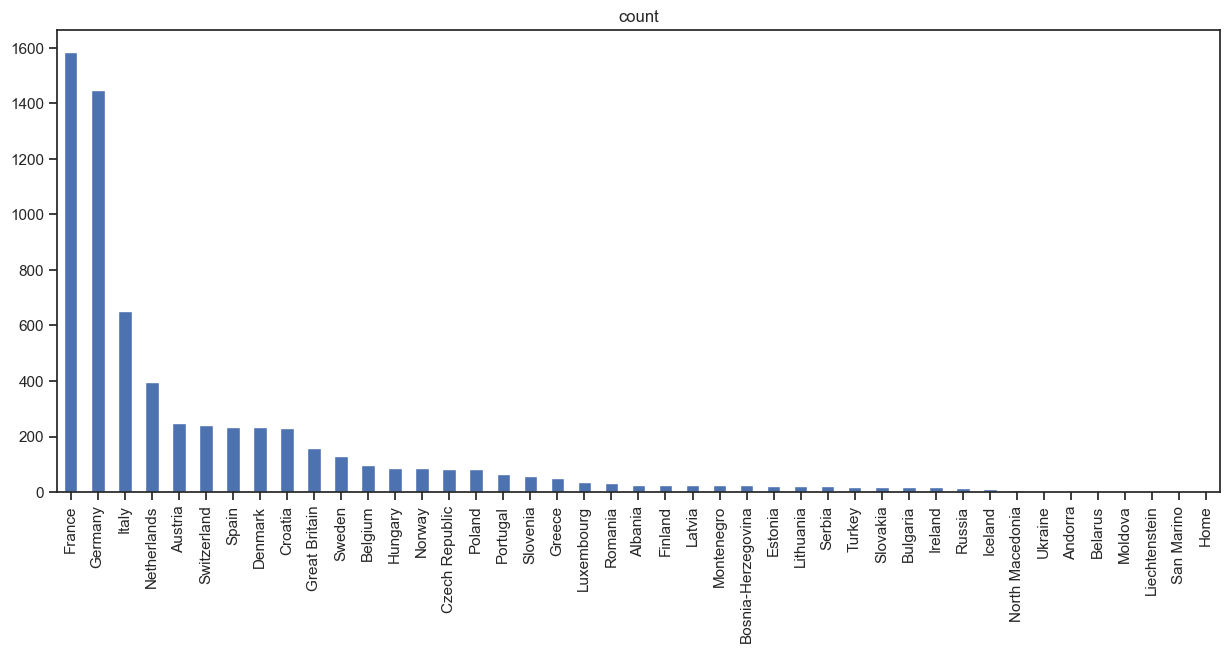

In [1884]:
plt.figure(figsize=(15,6))
CampSite_df1['country'].value_counts().plot(kind='bar')
plt.title('count')
plt.show()

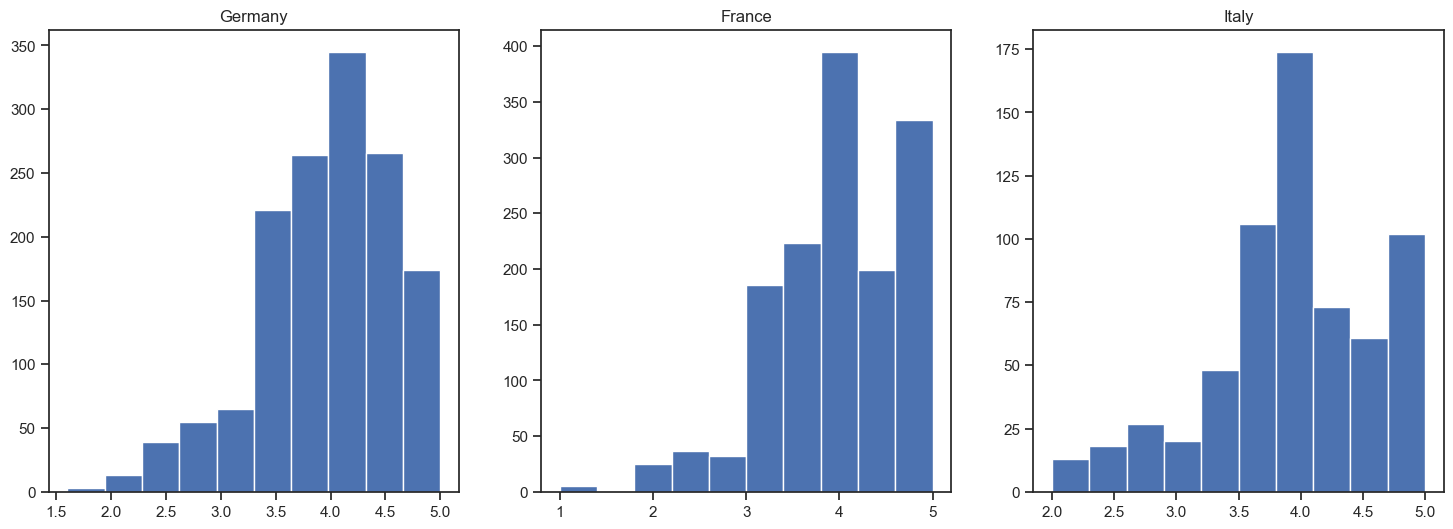

In [1885]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

ax[0].hist(germany_df['rating'], bins=10)
ax[0].set_title('Germany')

ax[1].hist(france_df['rating'], bins=10)
ax[1].set_title('France')

ax[2].hist(italy_df['rating'], bins=10)
ax[2].set_title('Italy')

plt.show()

# preprocessing the data

In [1886]:
dictt2 = {'On':None}
CampSite_df1['transport'].replace(dictt2, inplace= True)
CampSite_df1['transport'] = CampSite_df1['transport'].astype(float)

CampSite_df1 = CampSite_df1.dropna(subset=['rating'])
CampSite_df1 = CampSite_df1.dropna(subset=['country'])
CampSite_df1 = CampSite_df1.dropna(subset=['price'])
CampSite_df1['square_meters'] = CampSite_df1['square_meters'].astype(str)
CampSite_df1['square_meters'] = CampSite_df1['square_meters'].apply(lambda x: x.replace(",", ""))
CampSite_df1['square_meters'] = CampSite_df1['square_meters'].astype(float)

dictt4 = {'On':None}
CampSite_df1['lake(Km)'].replace(dictt4,inplace = True)
CampSite_df1['lake(Km)'] = CampSite_df1['lake(Km)'].astype(float)

CampSite_df1['river(Km)'] = CampSite_df1['river(Km)'].str.replace("km", "")
dictt = {'On site':None}
CampSite_df1['river(Km)'].replace(dictt, inplace= True)
CampSite_df1['river(Km)'] = CampSite_df1['river(Km)'].astype(float)

dictt3 = {'On':None}
CampSite_df1['next_city(Km)'].replace(dictt3, inplace= True)
CampSite_df1['next_city(Km)'] = CampSite_df1['next_city(Km)'].astype(float)

CampSite_df1 = CampSite_df1.drop('sea(Km)', axis=1)

encoder = LabelEncoder()
CampSite_df1['country'] = encoder.fit_transform(CampSite_df1['country'])
CampSite_df1

CampSite_df1.transport.fillna(CampSite_df1.transport.median(),inplace = True)
CampSite_df1.square_meters.fillna(CampSite_df1.square_meters.median(),inplace = True)
CampSite_df1.total_pitches.fillna(CampSite_df1.total_pitches.median(),inplace = True)
CampSite_df1.caravns.fillna(CampSite_df1.caravns.mode()[0],inplace = True)
CampSite_df1['lake(Km)'].fillna(CampSite_df1['lake(Km)'].median(),inplace = True)
CampSite_df1['river(Km)'].fillna(CampSite_df1['river(Km)'].median(),inplace = True)
CampSite_df1['site_on_mountain'].fillna(CampSite_df1['site_on_mountain'].mode()[0],inplace = True)
CampSite_df1['Height_of_site'].fillna(CampSite_df1['Height_of_site'].median(),inplace = True)
CampSite_df1['next_city(Km)'].fillna(CampSite_df1['next_city(Km)'].median(),inplace = True)

#Cleaning duplicate rows 

CampSite_df1 = CampSite_df1.drop_duplicates()

# Removing extra strings in the columns, replacing categorical string values with numerical values
replace_dict = {'caravns':{'Not available':0,'Available':1} , 'site_on_mountain':{'No':2,'Yes':3}}
CampSite_df1.replace(replace_dict,inplace = True)

In [1891]:
CampSite_df1

,country,price,transport,square_meters,total_pitches,caravns,lake(Km),river(Km),site_on_mountain,Height_of_site,next_city(Km),rating
0,2,29.0,0.20,3.0,50.0,0,4.50,2.0,2,300.0,6.0,4.8
1,13,24.0,0.60,12.0,310.0,1,4.50,0.5,2,355.0,2.5,4.8
2,30,17.0,0.10,4.5,200.0,0,20.00,5.0,2,38.0,2.0,4.8
3,2,28.0,1.00,1.5,65.0,0,4.50,2.0,3,960.0,7.0,4.8
4,13,33.0,1.00,11.0,250.0,1,15.00,5.0,2,81.0,5.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
6529,20,26.0,0.01,1.0,85.0,0,0.03,2.0,2,330.0,8.0,3.6
6530,39,45.0,3.00,4.0,320.0,0,4.50,2.0,2,330.0,20.0,3.6
6531,13,17.0,1.00,4.0,220.0,1,4.50,2.0,2,330.0,8.0,3.6
6532,13,20.0,1.00,13.0,250.0,0,4.50,2.0,2,330.0,8.0,3.6


In [1870]:
print(encoder.inverse_transform(CampSite_df1['country']))
CampSite_df1.head(100)

['Austria' 'Germany' 'Poland' ... 'Germany' 'Germany' 'France']


,country,price,transport,square_meters,total_pitches,caravns,lake(Km),river(Km),site_on_mountain,Height_of_site,next_city(Km),rating
0,2,29.0,0.20,3.0,50.0,0,4.5,2.0,2,300.0,6.0,4.8
1,13,24.0,0.60,12.0,310.0,1,4.5,0.5,2,355.0,2.5,4.8
2,30,17.0,0.10,4.5,200.0,0,20.0,5.0,2,38.0,2.0,4.8
3,2,28.0,1.00,1.5,65.0,0,4.5,2.0,3,960.0,7.0,4.8
4,13,33.0,1.00,11.0,250.0,1,15.0,5.0,2,81.0,5.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,32.0,1.00,1.0,32.0,0,2.0,2.0,3,433.0,3.0,4.9
96,12,20.0,1.00,5.0,100.0,0,4.5,2.0,2,330.0,8.0,4.9
97,2,28.0,1.00,0.5,25.0,0,25.0,25.0,2,820.0,4.0,4.8
98,2,23.0,0.30,2.5,65.0,0,20.0,2.0,3,800.0,25.0,4.8


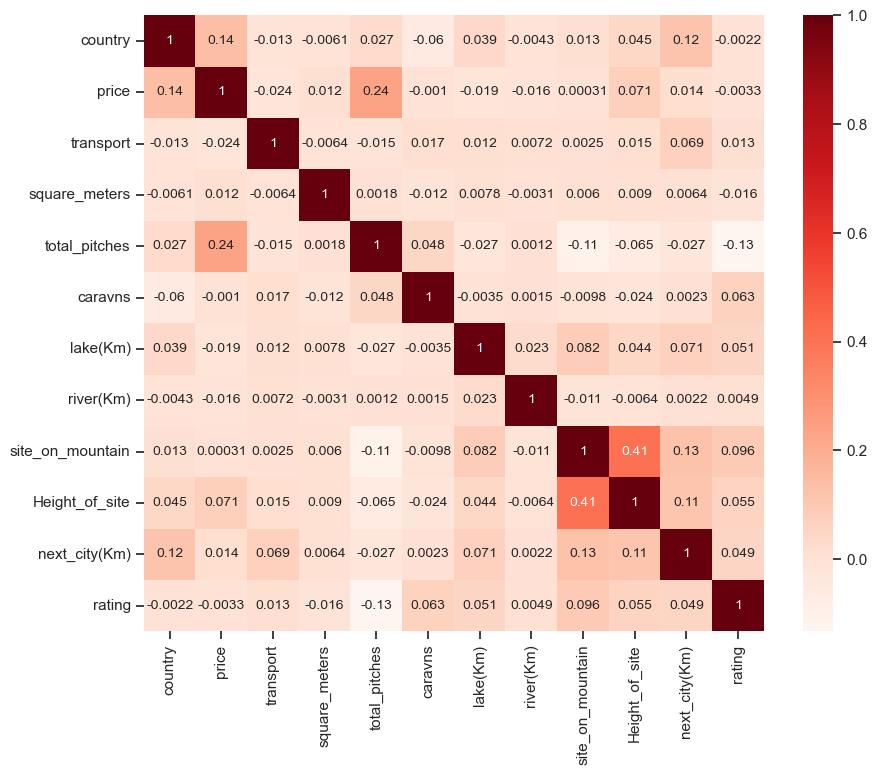

In [1800]:
# Create a heatmap using the correlation matrix
corr_matrix = CampSite_df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="Reds", annot=True, annot_kws={"size": 10})
plt.show()

# Distribution of the attributes

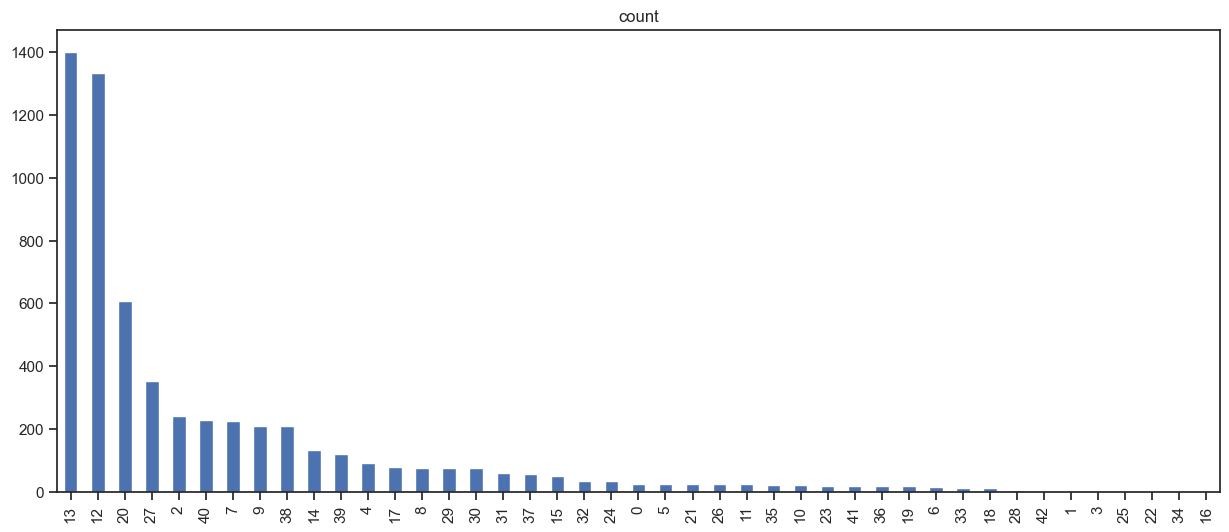

In [1640]:
# Plotting the distribution of each column values

plt.figure(figsize=(15,6))
CampSite_df1['country'].value_counts().plot(kind='bar')
plt.title('count')
plt.show()

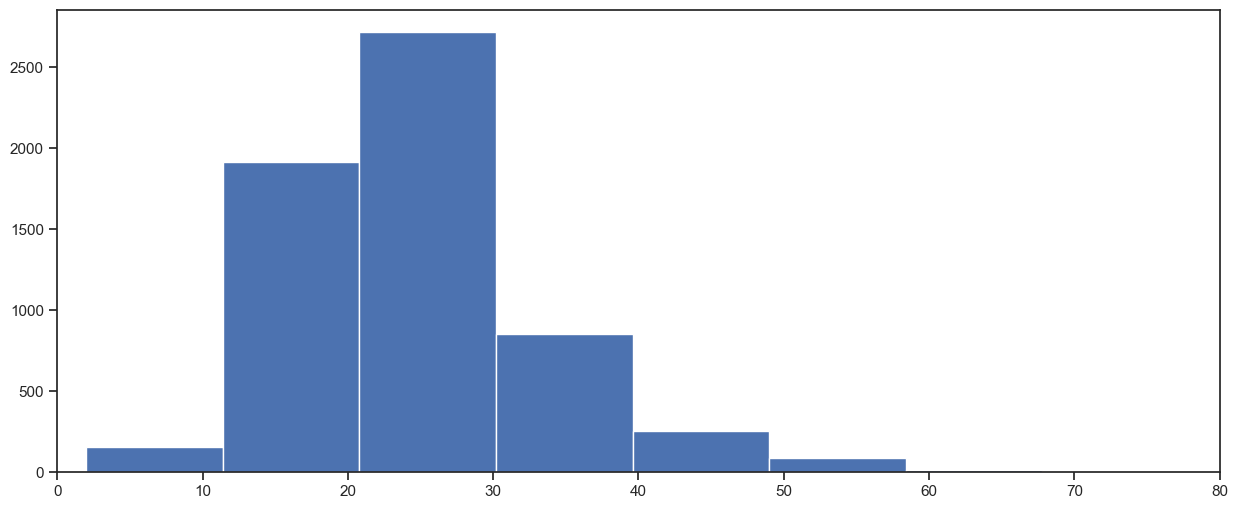

In [1641]:
plt.figure(figsize=(15,6))
plt.hist(CampSite_df1['price'],bins=15)
plt.xlim(0, 80)
plt.show()

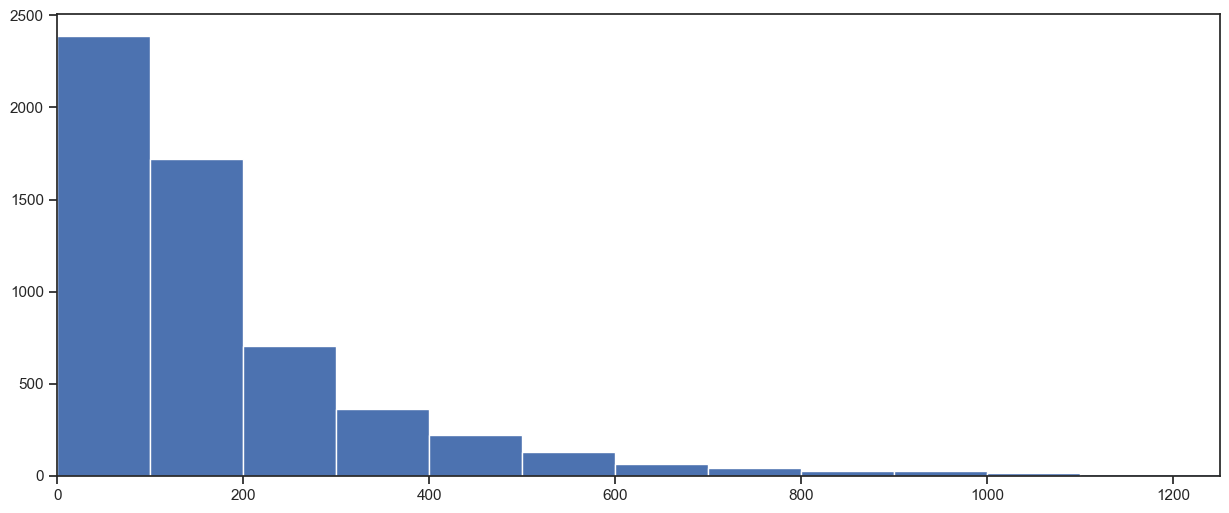

In [1873]:
plt.figure(figsize=(15,6))
plt.hist(CampSite_df1['total_pitches'],bins=30)
plt.xlim(0, 1250)
plt.show()

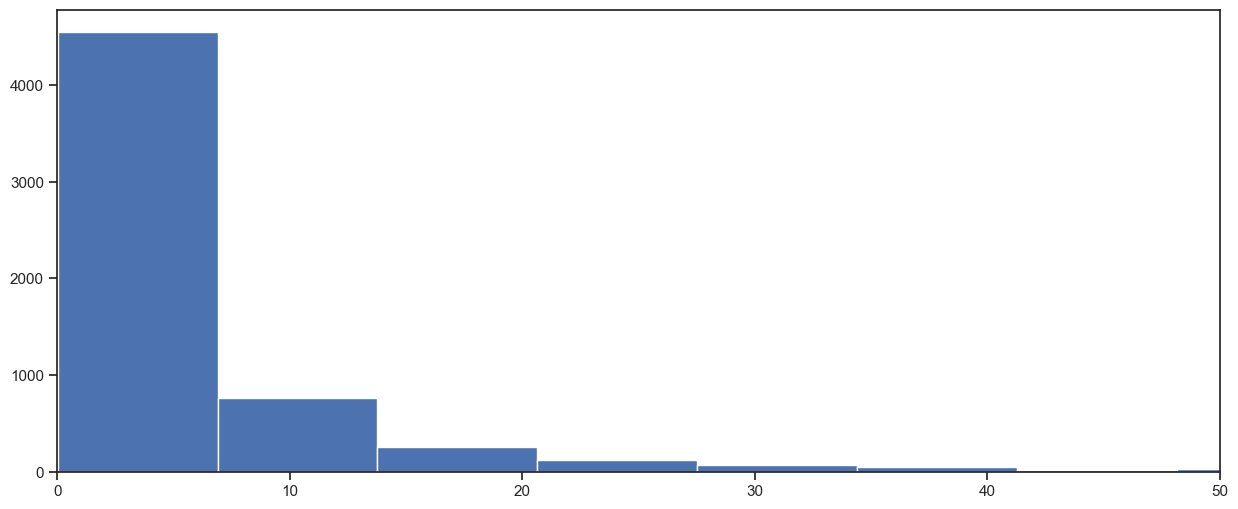

In [1643]:
plt.figure(figsize=(15,6))
plt.hist(CampSite_df1['square_meters'],bins=8000)
plt.xlim(0, 50)
plt.show()

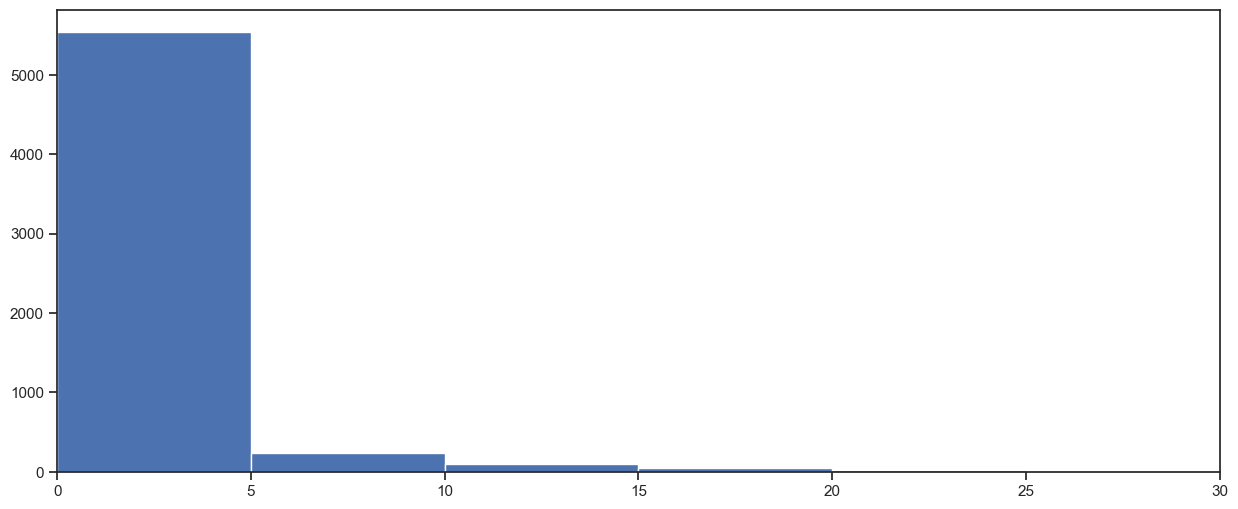

In [1644]:
plt.figure(figsize=(15,6))
plt.hist(CampSite_df1['transport'],bins=100)
plt.xlim(0, 30)
plt.show()


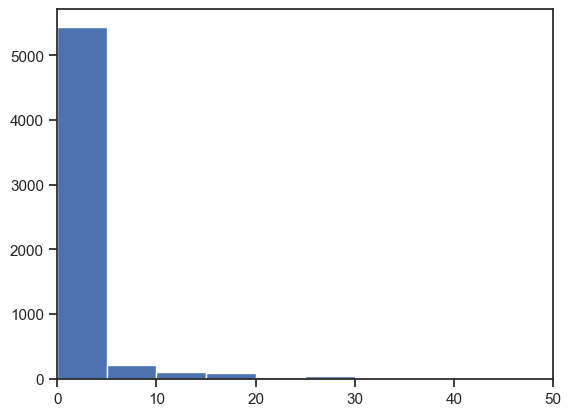

In [1645]:
plt.hist(CampSite_df1['lake(Km)'],bins=80)
plt.xlim(0, 50)
plt.show()

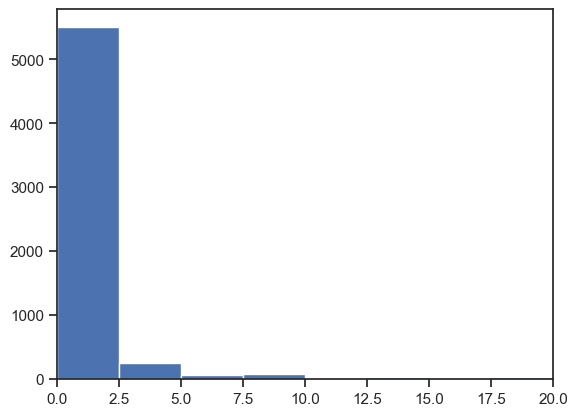

In [1646]:
plt.hist(CampSite_df1['river(Km)'],bins=360)
plt.xlim(0, 20)
plt.show()

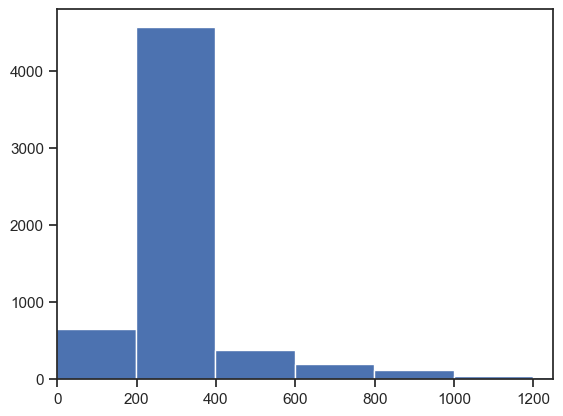

In [1647]:
plt.hist(CampSite_df1['Height_of_site'],bins=10)
plt.xlim(0, 1250)
plt.show()

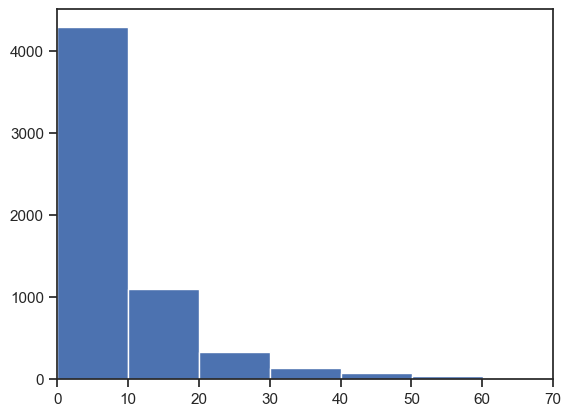

In [1648]:
plt.hist(CampSite_df1['next_city(Km)'],bins=60)
plt.xlim(0, 70)
plt.show()

<AxesSubplot:>

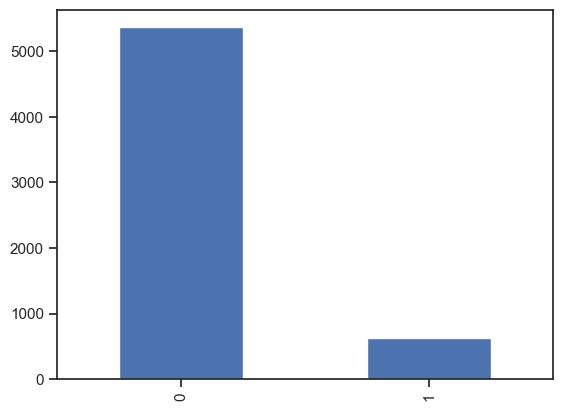

In [1649]:
CampSite_df1['caravns'].value_counts().plot(kind='bar')

<AxesSubplot:>

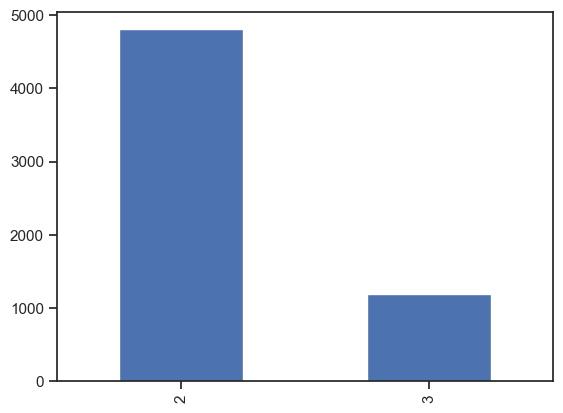

In [1650]:
CampSite_df1['site_on_mountain'].value_counts().plot(kind='bar')

# MODELS

In [1821]:
# Creating the LinearRegression modele for the regular dataframe

X = CampSite_df1.drop(['rating'], axis=1)
y = CampSite_df1['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('the R2 of the regular dataframe is:',r2)

the R2 of the regular dataframe is: 0.018533350538569415


In [1822]:
# Sscaling the dataframe values using the MINMaxScaler 

target = CampSite_df1['rating']
features = CampSite_df1.drop(columns=['rating'])


scaler = MinMaxScaler()


scaler.fit(features)


scaled_features = scaler.transform(features)

# Create a new DataFrame with the scaled features and target
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['rating'] = target


In [1823]:
df_scaled=df_scaled.dropna()
df_scaled

,country,price,transport,square_meters,total_pitches,caravns,lake(Km),river(Km),site_on_mountain,Height_of_site,next_city(Km),rating
0,0.047619,0.191489,0.000398,0.000054,0.016667,0.0,0.011225,0.002211,0.0,0.150849,0.009934,4.8
1,0.309524,0.156028,0.001198,0.000218,0.103333,1.0,0.011225,0.000544,0.0,0.178322,0.004100,4.8
2,0.714286,0.106383,0.000198,0.000081,0.066667,0.0,0.049976,0.005545,0.0,0.019980,0.003267,4.8
3,0.047619,0.184397,0.001998,0.000027,0.021667,0.0,0.011225,0.002211,1.0,0.480519,0.011601,4.8
4,0.309524,0.219858,0.001998,0.000200,0.083333,1.0,0.037476,0.005545,0.0,0.041459,0.008267,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
5991,0.476190,0.170213,0.000018,0.000018,0.028333,0.0,0.000050,0.002211,0.0,0.165834,0.013268,3.9
5992,0.928571,0.304965,0.005998,0.000072,0.106667,0.0,0.011225,0.002211,0.0,0.165834,0.033269,3.9
5993,0.309524,0.106383,0.001998,0.000072,0.073333,1.0,0.011225,0.002211,0.0,0.165834,0.013268,3.9
5994,0.309524,0.127660,0.001998,0.000236,0.083333,0.0,0.011225,0.002211,0.0,0.165834,0.013268,3.9


In [1824]:
# Creating the LinearRegression modele for the scaled dataframe

X = df_scaled.drop(['rating'], axis=1)
y = df_scaled['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('the R2 of the scaled dataframe is :',r2)

the R2 of the scaled dataframe is : 0.0075692998745956475


In [1825]:
# Using the get_dummies function to improve the results
CampSite_df1['caravns'] = CampSite_df1['caravns'].astype('category')
CampSite_df1['site_on_mountain'] = CampSite_df1['site_on_mountain'].astype('category')
CampSite_df3 = pd.get_dummies(CampSite_df1,columns = ['caravns'], prefix = ['caravans']) 
CampSite_df3 = pd.get_dummies(CampSite_df1,columns = ['site_on_mountain'], prefix = ['site_on_mountain'])

In [1826]:
# Creating the LinearRegression modele for the data with get dummies
X = CampSite_df3.drop(['rating'], axis=1)
y = CampSite_df3['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('the R2 of the scaled dataframe is :',r2)

the R2 of the scaled dataframe is : 0.018533350538564197


In [1898]:
CampSite_df2 = CampSite_df1.copy()

In [1899]:
# Making the coulmns as a category types


bins1 = [-10, 200 , 400 , 600 , 800 , 1000 , 2000]
bins2 = [-1 , 100,200,300,400,500,600,700,800,900,3500]
bins3 =[-1 , 1, 2 ,3, 4 ,6]


CampSite_df2['Height_of_site'] = pd.cut(CampSite_df2['Height_of_site'], bins=bins1, labels=range(4, 10))
CampSite_df2['total_pitches'] = pd.cut(CampSite_df2['total_pitches'], bins=bins2, labels=range(10, 20))
CampSite_df2['rating'] = pd.cut(CampSite_df2['rating'], bins=bins3, labels=range(1,6 ))



CampSite_df2[['price','transport', 'square_meters', 'lake(Km)', 'river(Km)', 'next_city(Km)']] = CampSite_df2[['price','transport', 'square_meters', 'lake(Km)', 'river(Km)', 'next_city(Km)']].round()


In [1900]:
CampSite_df2

,country,price,transport,square_meters,total_pitches,caravns,lake(Km),river(Km),site_on_mountain,Height_of_site,next_city(Km),rating
0,2,29.0,0.0,3.0,10,0,4.0,2.0,2,5,6.0,5
1,13,24.0,1.0,12.0,13,1,4.0,0.0,2,5,2.0,5
2,30,17.0,0.0,4.0,11,0,20.0,5.0,2,4,2.0,5
3,2,28.0,1.0,2.0,10,0,4.0,2.0,3,8,7.0,5
4,13,33.0,1.0,11.0,12,1,15.0,5.0,2,4,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6529,20,26.0,0.0,1.0,10,0,0.0,2.0,2,5,8.0,4
6530,39,45.0,3.0,4.0,13,0,4.0,2.0,2,5,20.0,4
6531,13,17.0,1.0,4.0,12,1,4.0,2.0,2,5,8.0,4
6532,13,20.0,1.0,13.0,12,0,4.0,2.0,2,5,8.0,4


In [1901]:
# Creating the LinearRegression modele for the bins data
X = CampSite_df2.drop(['rating'], axis=1)
y = CampSite_df2['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('the R2 of the scaled dataframe is :',r2)

the R2 of the scaled dataframe is : 0.010617483848747056


In [1902]:
CampSite_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5996 entries, 0 to 6534
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           5996 non-null   int32   
 1   price             5996 non-null   float64 
 2   transport         5996 non-null   float64 
 3   square_meters     5996 non-null   float64 
 4   total_pitches     5996 non-null   category
 5   caravns           5996 non-null   int64   
 6   lake(Km)          5996 non-null   float64 
 7   river(Km)         5996 non-null   float64 
 8   site_on_mountain  5996 non-null   int64   
 9   Height_of_site    5996 non-null   category
 10  next_city(Km)     5996 non-null   float64 
 11  rating            5996 non-null   category
dtypes: category(3), float64(6), int32(1), int64(2)
memory usage: 463.0 KB


In [1846]:
X = CampSite_df2.drop(['rating','site_on_mountain','total_pitches'], axis=1).values
y = CampSite_df2['rating'].values

XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.2)

gnb = GaussianNB()

# Train classifier
gnb.fit(XTrain,yTrain)

y_pred = gnb.predict(XTest)
y_pred_train = gnb.predict(XTrain)

accuracy = accuracy_score(yTest, y_pred)
print('Accuracy on Train data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on Train data=  0.12155963302752294
Accuracy on test data=  0.135


In [1847]:
gnb.class_prior_

array([0.00083, 0.01272, 0.11551, 0.42744, 0.44349])

In [1848]:
np.set_printoptions(precision=5, suppress=True)
print(gnb.theta_)

[[ 15.75     25.5       7.75      3.        0.        4.25      2.
    4.75     12.5    ]
 [ 16.54098  23.14754   1.2623   10.2623    0.03279   5.63934   2.36066
    4.98361   9.18033]
 [ 17.6787   23.80686   1.93682 141.11913   0.06318   4.6065    2.20758
    5.01444   9.53791]
 [ 17.10732  24.58244   2.4161  117.10976   0.09317   4.80537   2.76634
    5.06976  11.17317]
 [ 16.9826   25.14245   2.09403  50.52797   0.12929   5.62529   2.44429
    5.16126  11.71039]]
